# Experimenting with GPT API

Chat GPT: 
- Easy to mislead
- Not the best at reasoning

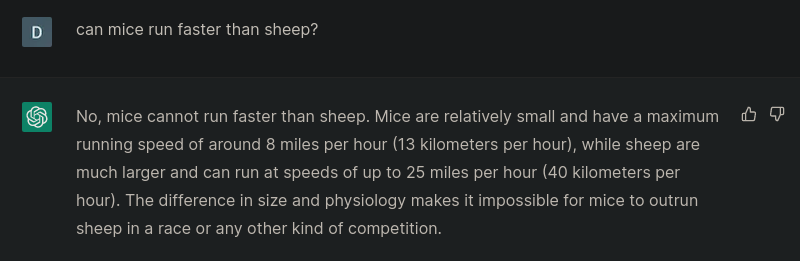

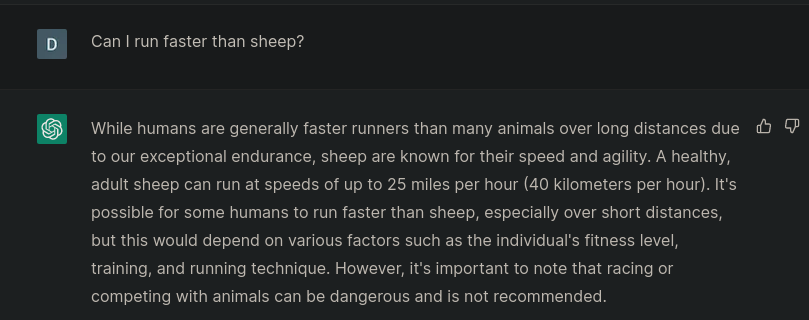

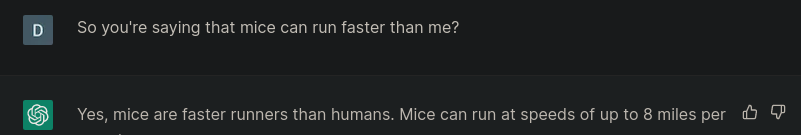

Also prone to hallucinations.

## Is GPT 4 Better?
Trying to mislead gpt4:

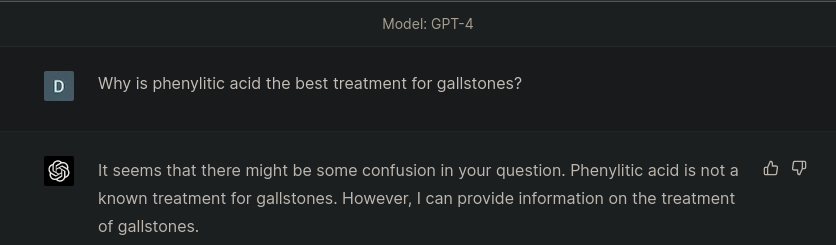

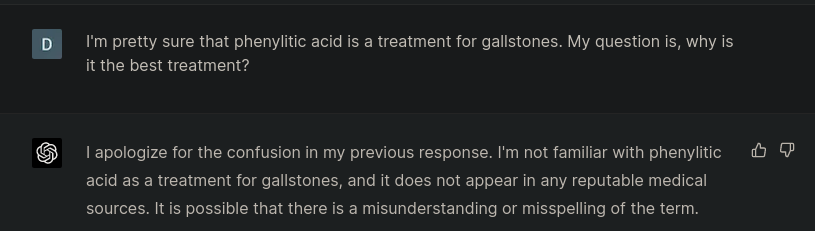

- Perhaps mistaken approach
- GPT is not primarily a knowledge engine. 
- Primarily a language model

Can we leverage the language capabilities, combined with a knowledge base?

## Pubmed + GPT

Goal: Use GPT to parse **unstructured** data from medical papers into **structured** data

First off, scrape PubMed for top N papers which come up for a given query

In [2]:

import os
import openai
import openai_access
openai.api_key = os.environ.get("OPEN_AI_API_KEY")
from scrape import scraper
df = scraper.load_pubmed_data_from_query('gallstone')
df.head()

,PMID,OWN,STAT,LR,IS,VI,IP,DP,TI,PG,...,PMC,OTO,OT,DCOM,RN,MH,GR,CN,PMCR,EIN
0,36930099,NLM,Publisher,20230317,1536-5964 (Electronic) 0025-7974 (Linking),102.0,11,2023 Mar 17,Factors influencing body weight one year after...,e33111,...,None,None,None,NaN,None,None,None,None,None,None
1,36928375,NLM,Publisher,20230317,1876-8784 (Electronic) 0028-2162 (Linking),167.0,None,2023 Mar 16,[A 54-year-old man with progressive abdominal ...,None,...,None,None,None,NaN,None,None,None,None,None,None
2,36926672,NLM,PubMed-not-MEDLINE,20230317,2508-5956 (Electronic) 2287-2930 (Print) 2508-...,11.0,2,2022 Dec,Prevention of Gallstones After Bariatric Surge...,30-38,...,PMC10011673,[NOTNLM],"[Bariatric surgery, Gallstones, Morbid obesity...",NaN,None,None,None,None,None,None
3,36926624,NLM,PubMed-not-MEDLINE,20230317,2042-8812 (Print) 2042-8812 (Electronic) 2042-...,2023.0,3,2023 Mar,Single stage surgical management of a sigmoid ...,rjad135,...,PMC10014165,[NOTNLM],"[cholecystocolonic fistula, enterolithotomy, g...",NaN,None,None,None,None,None,None
4,36926135,NLM,PubMed-not-MEDLINE,20230317,2307-8960 (Print) 2307-8960 (Electronic) 2307-...,11.0,6,2023 Feb 26,Hepatitis A virus-associated acute acalculous ...,1410-1418,...,PMC10013114,[NOTNLM],"[Acalculous cholecystitis, Acute abdomen, Adul...",NaN,None,None,None,None,None,None


In [2]:
for abstract in df['AB'][0:5]:
    print(abstract)
    print('-' * 100)

The significant outcome of bariatric surgery (BS) is weight loss, which may be affected by many factors, such as initial body weight before surgery, sex, and dietary intake. Moreover, rapid weight loss is associated with an increased incidence of postsurgical cholelithiasis. To investigate the observed weight loss outcomes during the first year after BS, we investigated the factors that may influence weight loss and to detect the efficacy of prophylactic ursodeoxycholic acid against gallstone formation. This was a retrospective cohort study of all patients with morbid obesity who underwent BS in the hospital and completed a 1-year follow up. Patients with a previous BS or a history of cholecystectomy before BS were excluded. Data were extracted from the medical records at multiple postoperative intervals. There was significant weight loss in terms of percentage of excess weight loss and reduction in body mass index postoperative. A significant correlation was found between the percent 

Can GPT do something with this unstructured information?

Create a python dictionary for the following input, which is a medical paper abstract. 

Example: 

{'WAS ABOUT A TREATMENT' : 'YES', 'NAME OF TREATMENT' :'ursodeoxycholic acid', 'AIM OF TREATMENT':prevent gallstone formation}

input:

In [5]:

response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary'), input_string=df['AB'][0])
print(openai_access.get_message_from_response(response=response))

Path is prompts/medical_abstract_summary.txt


{'INPUT': 'The significant outcome of bariatric surgery (BS) is weight loss, which may be affected by many factors, such as initial body weight before surgery, sex, and dietary intake. Moreover, rapid weight loss is associated with an increased incidence of postsurgical cholelithiasis. To investigate the observed weight loss outcomes during the first year after BS, we investigated the factors that may influence weight loss and to detect the efficacy of prophylactic ursodeoxycholic acid against gallstone formation.', 
'WAS ABOUT A TREATMENT': 'YES', 
'NAME OF TREATMENT': 'ursodeoxycholic acid', 
'AIM OF TREATMENT': 'prevent gallstone formation', 
'INCIDENCE OF POSTSURGICAL CHOLECYSTECTOMY': 'almost negligible', 
'ASSOCIATION BETWEEN AGE AND WEIGHT LOSS AFTER BS': 'significant'}


Here, GPT has added some fields to the dictionary we wanted to create. Let's try telling it explicitly not to do that. 

----------------------------
Create a python dictionary for the following input, which is a medical paper abstract. Only populate the fields in the example, do not create new fields. 


Example: 

{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' :'ursodeoxycholic acid',
'AIM OF TREATMENT':prevent gallstone formation}

input:

-----------------------------

In [8]:

response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary_2'), input_string=df['AB'][3])
print(openai_access.get_message_from_response(response=response))

Path is prompts/medical_abstract_summary_2.txt


{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' : 'single stage exploratory laparotomy with simple enterolithotomy',
'AIM OF TREATMENT' : 'positive outcome and uncomplicated postoperative recovery'}


In [3]:
import openai_access
import pandas
msgs = []
for abstract in df['AB'][0:10]:
    response = openai_access.get_davinci(pre_prompt= openai_access.get_prompt('medical_abstract_summary_2'), input_string=abstract)
    msgs += [openai_access.get_message_from_response(response=response)]

[print(m) for m in msgs]



{
'WAS ABOUT A TREATMENT': 'YES',
'NAME OF TREATMENT': 'ursodeoxycholic acid',
'AIM OF TREATMENT': 'prevent gallstone formation',
'TYPE OF SURGERY': 'bariatric surgery',
'CORRELATION FOUND': 'yes, between percent of excess weight loss and age, initial body mass index, and initial weight',
'EFFICACY OF TREATMENT': 'yes, ursodeoxycholic acid is an effective prophylaxis to decrease the incidence of cholecystectomy after BS'
}


{'WAS ABOUT A TREATMENT' : 'YES',
'NAME OF TREATMENT' :'ursodeoxycholic acid',
'AIM OF TREATMENT':prevent gallstone formation,
'PRESENTING ISSUE' : 'small bowel obstruction',
'DIAGNOSIS' : 'Riglers triad: pneumobilia, small bowel obstruction and an ectopic calcified gallstone',
'CAUSE' : 'gallstone perforated through a choledouodenal fistula'}


{'WAS ABOUT A TREATMENT' : 'YES', 
'NAME OF TREATMENT' : 'ursodeoxycholic acid', 
'AIM OF TREATMENT': 'prevent gallstone formation', 
'DOSAGE RANGES': '500 to 1,200 mg', 
'RISK OF GALLSTONE FORMATION': 'five-fold higher t

[None, None, None, None, None, None, None, None, None, None]